In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('agri_energy.csv')


In [7]:
# Cyclical encoding of month
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

# Energy intensity feature
df["total_renewable_mw"] = (
    df["solar_mw_district"] + df["wind_mw"] + df["bioenergy_mw"]
)

# Pumps per MW (efficiency proxy)
df["pumps_per_mw"] = df["solar_pumps_installed"] / (df["solar_mw_district"] + 0.01)


In [8]:
df.columns

Index(['state', 'district', 'year', 'month', 'solar_mw_district', 'wind_mw',
       'bioenergy_mw', 'solar_pumps_installed',
       'estimated_co2_reduction_tonnes', 'year_month', 'month_sin',
       'month_cos', 'total_renewable_mw', 'pumps_per_mw'],
      dtype='object')

In [9]:
df.shape

(79596, 14)

In [10]:
from sklearn.model_selection import train_test_split

features = [
    "solar_mw_district", "wind_mw", "bioenergy_mw",
    "solar_pumps_installed", "month_sin", "month_cos",
    "total_renewable_mw", "pumps_per_mw"
]

X = df[features]
y = df["estimated_co2_reduction_tonnes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## trianing linear regression model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))



Linear Regression R2: 0.9999999999999981
Linear Regression MAE: 0.002133667481679652


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest R2: 0.9999999967570168
Random Forest MAE: 0.08265782920541277


traing random forest model

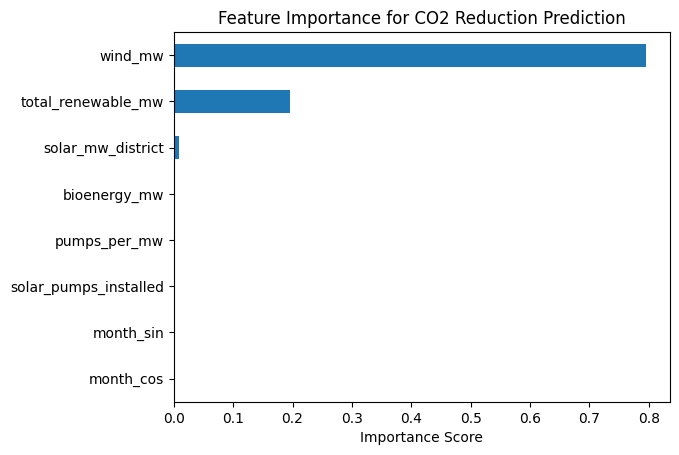

In [15]:
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=features)
importances = importances.sort_values(ascending=True)

plt.figure()
importances.plot(kind="barh")
plt.xlabel("Importance Score")
plt.title("Feature Importance for CO2 Reduction Prediction")
plt.show()
